## NBA API - Project 0

In [4]:
print("Let's begin!")

Let's begin!


In [12]:
import pandas as pd

from nba_api.stats.static import players

player_dict = players.get_players()

kd = [player for player in player_dict if player['full_name'] == 'Kevin Durant'][0]
kd_id = kd['id']
kd

{'id': 201142,
 'full_name': 'Kevin Durant',
 'first_name': 'Kevin',
 'last_name': 'Durant',
 'is_active': True}

In [13]:
from nba_api.stats.static import teams
team_dict = teams.get_teams()
PHX = [team for team in team_dict if team['full_name'] == 'Phoenix Suns'][0]
PHX_id = PHX['id']
PHX

{'id': 1610612756,
 'full_name': 'Phoenix Suns',
 'abbreviation': 'PHX',
 'nickname': 'Suns',
 'city': 'Phoenix',
 'state': 'Arizona',
 'year_founded': 1968}

In [17]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll

kd_gamelog = playergamelog.PlayerGameLog(player_id=kd_id, season = '2023')
kd_gamelog_df = kd_gamelog.get_data_frames()[0]

kd_gamelog_all = playergamelog.PlayerGameLog(player_id=kd_id, season = SeasonAll.all)
kd_gamelog_all_df = kd_gamelog_all.get_data_frames()[0]

kd_gamelog_df.head(10)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,201142,0022300511,"JAN 08, 2024",PHX @ LAC,L,35,10,17,0.588,...,7,7,2,0,1,3,2,30,-14,1
1,22023,201142,0022300503,"JAN 07, 2024",PHX vs. MEM,L,36,11,23,0.478,...,8,10,5,0,1,1,1,23,-7,1
2,22023,201142,0022300450,"DEC 31, 2023",PHX vs. ORL,W,39,12,21,0.571,...,5,5,5,3,1,0,1,31,9,1
3,22023,201142,0022300436,"DEC 29, 2023",PHX vs. CHA,W,39,8,11,0.727,...,3,4,11,1,3,1,2,21,10,1
4,22023,201142,0022300418,"DEC 27, 2023",PHX @ HOU,W,41,9,16,0.563,...,10,10,16,2,1,3,2,27,17,1
5,22023,201142,0022300405,"DEC 25, 2023",PHX vs. DAL,L,43,4,11,0.364,...,7,8,7,0,1,6,2,16,-5,1
6,22023,201142,0022300387,"DEC 22, 2023",PHX @ SAC,L,34,9,14,0.643,...,7,7,2,1,0,7,0,28,-14,1
7,22023,201142,0022300363,"DEC 19, 2023",PHX @ POR,L,38,16,28,0.571,...,4,4,5,2,0,5,1,40,8,1
8,22023,201142,0022300347,"DEC 17, 2023",PHX vs. WAS,W,35,11,24,0.458,...,2,5,5,1,1,2,1,28,-2,1
9,22023,201142,0022300333,"DEC 15, 2023",PHX vs. NYK,L,36,10,21,0.476,...,3,3,6,0,0,0,1,29,-7,1


In [49]:
from nba_api.stats.endpoints import leaguegamefinder

# filtered on 23-24 season and PHX
PHX_games_df = leaguegamefinder.LeagueGameFinder(team_id_nullable=PHX_id, season_nullable = '2023-24').get_data_frames()[0]
PHX_games_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612756,PHX,Phoenix Suns,0022300511,2024-01-08,PHX @ LAC,L,240,111,...,0.862,5,20,25,17,6,4,14,20,-27.6
1,22023,1610612756,PHX,Phoenix Suns,0022300503,2024-01-07,PHX vs. MEM,L,238,115,...,0.682,16,34,50,29,5,6,12,27,-4.2
2,22023,1610612756,PHX,Phoenix Suns,0022300489,2024-01-05,PHX vs. MIA,W,240,113,...,0.647,9,35,44,30,13,5,9,18,16.0
3,22023,1610612756,PHX,Phoenix Suns,0022300473,2024-01-03,PHX vs. LAC,L,240,122,...,0.885,10,22,32,23,9,2,16,23,-9.0
4,22023,1610612756,PHX,Phoenix Suns,0022300456,2024-01-01,PHX vs. POR,W,241,109,...,0.667,9,38,47,24,10,5,16,20,21.0


In [24]:
from nba_api.stats.endpoints import playercareerstats

ant = players.find_players_by_full_name('Anthony Edwards')[0]

ant_career = playercareerstats.PlayerCareerStats(player_id=ant['id'])
ant_career_df = ant_career.get_data_frames()[0]
ant_career_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630162,2020-21,00,1610612750,MIN,19.0,72,55,2314.0,505,...,0.776,59,277,336,211,82,36,160,129,1392
1,1630162,2021-22,00,1610612750,MIN,20.0,72,72,2466.0,549,...,0.786,62,281,343,275,105,46,190,164,1533
2,1630162,2022-23,00,1610612750,MIN,21.0,79,79,2841.0,707,...,0.756,47,411,458,350,125,58,259,186,1946
3,1630162,2023-24,00,1610612750,MIN,22.0,34,34,1184.0,308,...,0.845,25,157,182,166,45,21,119,63,894


### TeamDashLineups endpoint

In [60]:
from nba_api.stats.endpoints import teamdashlineups
import matplotlib.pyplot as plt

# set parameters
season_id = '2023-24'
team_id = teams.find_team_by_abbreviation('lal')['id']

#fetch data
lineupdata = teamdashlineups.TeamDashLineups(team_id=team_id, season=season_id)
lineupdata_df = lineupdata.get_data_frames()[1]

# filter lineups with minutes greater than 50
lineupdata_df = lineupdata_df[lineupdata_df['MIN'] > 50]

# display all columns
pd.set_option('display.max_columns', None)

# sort by PLUS_MINUS
top_5_lineups_PLUS_MINUS = lineupdata_df.sort_values('PLUS_MINUS', ascending=False).head(5)
top_5_lineups_PLUS_MINUS.head()



,GROUP_SET,GROUP_ID,GROUP_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
3,Lineups,-2544-203076-1626156-1627752-1631108-,L. James - A. Davis - D. Russell - T. Prince -...,8,5,3,0.625,71.966667,72,140,0.514,20,48,0.417,24,32,0.750,12,62,74,51,16.0,17,13,8,14,28,188,23.0,11,7,278,112,4,4,4,87,3,4,72,5,4,81,5,3,4,4,305,3,3,306,302,4,4,2
1,Lineups,-2544-203076-1626156-1627752-1630559-,L. James - A. Davis - D. Russell - T. Prince -...,22,13,9,0.591,129.415000,117,245,0.478,33,92,0.359,55,67,0.821,24,93,117,79,34.0,14,22,15,42,54,322,13.0,1,1,308,119,2,2,2,120,2,2,82,1,1,75,1,2,2,2,307,4,1,307,308,1,2,8
4,Lineups,-203076-1626156-1627752-1629060-1629629-,A. Davis - D. Russell - T. Prince - R. Hachimu...,10,8,2,0.800,55.243333,57,108,0.528,9,31,0.290,14,19,0.737,6,44,50,38,11.0,14,7,7,18,14,137,11.0,8,3,236,86,5,5,5,86,6,5,102,10,9,91,9,5,5,5,301,4,5,304,303,10,5,11
0,Lineups,-2544-203076-1626156-1627752-1629629-,L. James - A. Davis - D. Russell - T. Prince -...,14,9,5,0.643,150.918333,134,283,0.473,42,107,0.393,49,56,0.875,24,116,140,98,49.0,26,22,16,37,46,359,1.0,3,2,297,111,1,1,1,123,1,1,77,2,2,66,1,1,1,1,308,1,1,308,307,2,1,85
5,Lineups,-2544-203076-1626156-1629629-1630559-,L. James - A. Davis - D. Russell - C. Reddish ...,12,6,6,0.500,51.275000,48,90,0.533,10,30,0.333,22,29,0.759,8,35,43,28,15.0,12,12,4,21,25,128,-10.0,4,6,303,128,6,6,6,85,5,6,83,6,6,80,7,6,6,6,304,6,4,300,305,5,6,295


In [61]:
# sort by MIN
top_5_lineups_MIN = lineupdata_df.sort_values('MIN', ascending=False).head(5)
top_5_lineups_MIN.head()

,GROUP_SET,GROUP_ID,GROUP_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,Lineups,-2544-203076-1626156-1627752-1629629-,L. James - A. Davis - D. Russell - T. Prince -...,14,9,5,0.643,150.918333,134,283,0.473,42,107,0.393,49,56,0.875,24,116,140,98,49.0,26,22,16,37,46,359,1.0,3,2,297,111,1,1,1,123,1,1,77,2,2,66,1,1,1,1,308,1,1,308,307,2,1,85
1,Lineups,-2544-203076-1626156-1627752-1630559-,L. James - A. Davis - D. Russell - T. Prince -...,22,13,9,0.591,129.415000,117,245,0.478,33,92,0.359,55,67,0.821,24,93,117,79,34.0,14,22,15,42,54,322,13.0,1,1,308,119,2,2,2,120,2,2,82,1,1,75,1,2,2,2,307,4,1,307,308,1,2,8
2,Lineups,-2544-203076-1627752-1629629-1630559-,L. James - A. Davis - T. Prince - C. Reddish -...,11,5,6,0.455,93.823333,84,175,0.480,20,65,0.308,32,44,0.727,20,58,78,59,25.0,19,5,7,32,32,220,-22.0,6,7,303,164,3,3,3,119,3,3,100,3,3,92,3,4,3,3,306,2,6,304,306,3,3,306
3,Lineups,-2544-203076-1626156-1627752-1631108-,L. James - A. Davis - D. Russell - T. Prince -...,8,5,3,0.625,71.966667,72,140,0.514,20,48,0.417,24,32,0.750,12,62,74,51,16.0,17,13,8,14,28,188,23.0,11,7,278,112,4,4,4,87,3,4,72,5,4,81,5,3,4,4,305,3,3,306,302,4,4,2
4,Lineups,-203076-1626156-1627752-1629060-1629629-,A. Davis - D. Russell - T. Prince - R. Hachimu...,10,8,2,0.800,55.243333,57,108,0.528,9,31,0.290,14,19,0.737,6,44,50,38,11.0,14,7,7,18,14,137,11.0,8,3,236,86,5,5,5,86,6,5,102,10,9,91,9,5,5,5,301,4,5,304,303,10,5,11


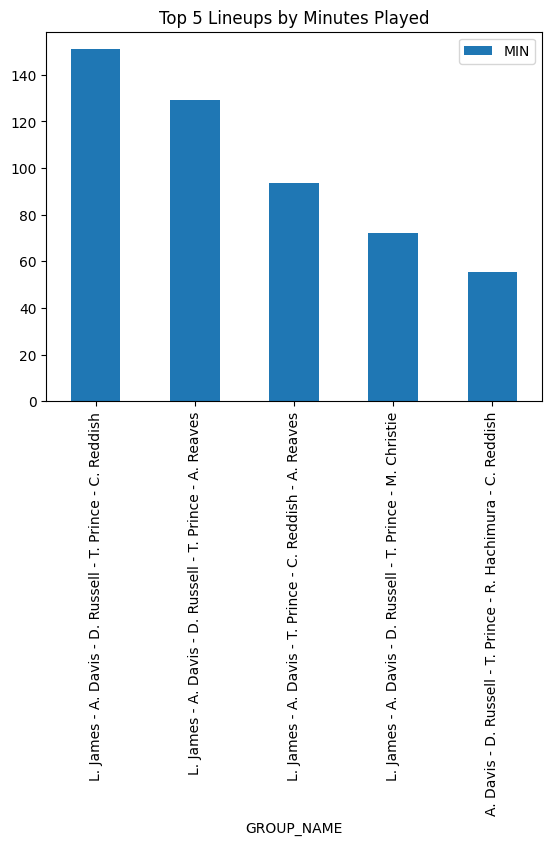

In [62]:
top_5_lineups_MIN.plot(kind='bar', x='GROUP_NAME', y='MIN', title='Top 5 Lineups by Minutes Played', rot=90)
plt.show()